In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
k = 10;

N = 2000 ## time steps
nEpisode = 500
SelectedActions = np.zeros((N,nEpisode))
Reward = np.zeros((N,nEpisode))
OptimalAction = np.zeros(nEpisode)
alpha = 0.01

In [ ]:
for e in range(0,nEpisode):
  qs = 5 + np.random.randn(k) # mean=5 and var=1
  OptimalAction[e] = np.argmax(qs)
  H = np.ones(k)

  for t in range(0,N):

    pr = np.exp(H) / np.sum(np.exp(H))
    A = np.random.choice(list((range(0,k))),size=1,p=pr)
    SelectedActions[t,e] = A
    Reward[t,e] = qs[A] + np.random.randn(1)
    if t == 0 :
      BaseLine = Reward[t,e]
    else:
      BaseLine = np.mean(Reward[:-1,e])

    T = np.zeros(k)
    T[A] = 1
    H = H + alpha*(Reward[t,e] - BaseLine) * (T - pr)

AverageReward = Reward.mean(axis=1)
OAP = np.zeros((N,nEpisode))
for e in range(0,nEpisode):
  OAP[:,e] = SelectedActions[:,e] == OptimalAction[e]
AverageOAP = OAP.mean(axis=1)
#print('Optimal Action Percent = ' , OAP*100,'%')

Text(0.5, 1.0, 'SGA Optimal Selected Actions')

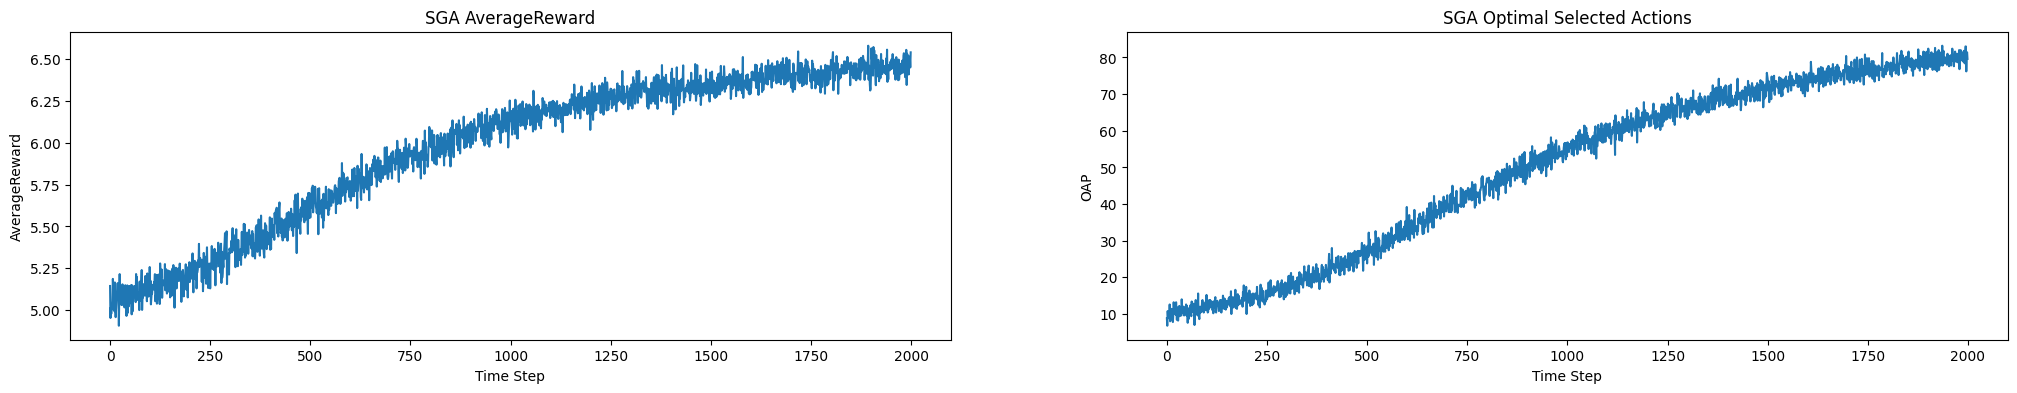

In [ ]:
plt.figure(figsize=(25,4))

plt.subplot(1, 2, 1)
plt.plot(range(0,N),AverageReward)
plt.xlabel('Time Step')
plt.ylabel('AverageReward')
plt.title('SGA AverageReward')

plt.subplot(1, 2, 2)
plt.plot(range(0,N),AverageOAP*100)
plt.xlabel('Time Step')
plt.ylabel('OAP')
plt.title('SGA Optimal Selected Actions' )
#sns.relplot(x=range(0,N), y=Reward, kind="line")